# SDGE Energy Usage Analysis

This notebook will generate some graphs of your energy usage by loading the data that can be downloaded from the SDGE website using the "Green Button Download" under the Usage tab of your account.

Enter the path to the file you downloaded below. If you are running this in Google Colab, upload the file by clicking on the folder icon to the left then clicking the icon of a sheet of paper with an up arrow (tooltip "Upload to session storage"). Once uploaded, set the path below to the name of the file. You can right click on the file to the left and choose "Copy path" then paste it below, for example:

```path = "/content/Electric_60_Minute_1-1-2021_1-26-2022_20220127.csv"```

After setting the path to the file above, open the Runtime menu above and choose the first option, "Run all". The graphs below should be updated with your data after a few seconds.

## Load and prepare the data

In [25]:
import pandas as pd

df = pd.read_csv(path, skiprows=13)

In [26]:
def format_date(str):
    month, day, year = str.split("/")
    return f"{year}-{int(month):02d}-{int(day):02d}"

df["Date"] = df["Date"].apply(format_date)

In [27]:
import datetime
df["Weekday"] = df["Date"].apply(lambda isodate: datetime.date.fromisoformat(isodate).weekday())
df["Month"] = df["Date"].apply(lambda isodate: datetime.date.fromisoformat(isodate).month)

In [28]:
pt = pd.pivot_table(df, "Consumption", "Start Time", "Date")
pt = pt.reindex(index = ["12:00 AM", "1:00 AM", "2:00 AM", "3:00 AM", "4:00 AM", "5:00 AM", "6:00 AM",
                      "7:00 AM", "8:00 AM", "9:00 AM", "10:00 AM", "11:00 AM", "12:00 PM", "1:00 PM",
                      "2:00 PM", "3:00 PM", "4:00 PM", "5:00 PM", "6:00 PM", "7:00 PM", "8:00 PM",
                      "9:00 PM", "10:00 PM", "11:00 PM"])

## Usage graphs

In [39]:
print(pd.to_datetime(df["Date"][0]).strftime('%a'))

Sat


In [42]:
"""This function will create new data strings for the seaborn chart so that the day of week will show up in the text
E.g.: 
Old: 2022-02-07
New: 2022-02-07 (Mond)
"""

def create_date_strs(date_list):
    formatted_list = []
    for _date in date_list.unique():
        formatted_list.append(_date + " ({})".format(pd.to_datetime(_date).strftime('%a')))
                              
    return formatted_list

formatted_dates = create_date_strs(df["Date"])
print(formatted_dates)

['2022-01-01 (Sat)', '2022-01-02 (Sun)', '2022-01-03 (Mon)', '2022-01-04 (Tue)', '2022-01-05 (Wed)', '2022-01-06 (Thu)', '2022-01-07 (Fri)', '2022-01-08 (Sat)', '2022-01-09 (Sun)', '2022-01-10 (Mon)', '2022-01-11 (Tue)', '2022-01-12 (Wed)', '2022-01-13 (Thu)', '2022-01-14 (Fri)', '2022-01-15 (Sat)', '2022-01-16 (Sun)', '2022-01-17 (Mon)', '2022-01-18 (Tue)', '2022-01-19 (Wed)', '2022-01-20 (Thu)', '2022-01-21 (Fri)', '2022-01-22 (Sat)', '2022-01-23 (Sun)', '2022-01-24 (Mon)', '2022-01-25 (Tue)', '2022-01-26 (Wed)', '2022-01-27 (Thu)', '2022-01-28 (Fri)', '2022-01-29 (Sat)', '2022-01-30 (Sun)', '2022-01-31 (Mon)', '2022-02-01 (Tue)', '2022-02-02 (Wed)', '2022-02-03 (Thu)', '2022-02-04 (Fri)', '2022-02-05 (Sat)']


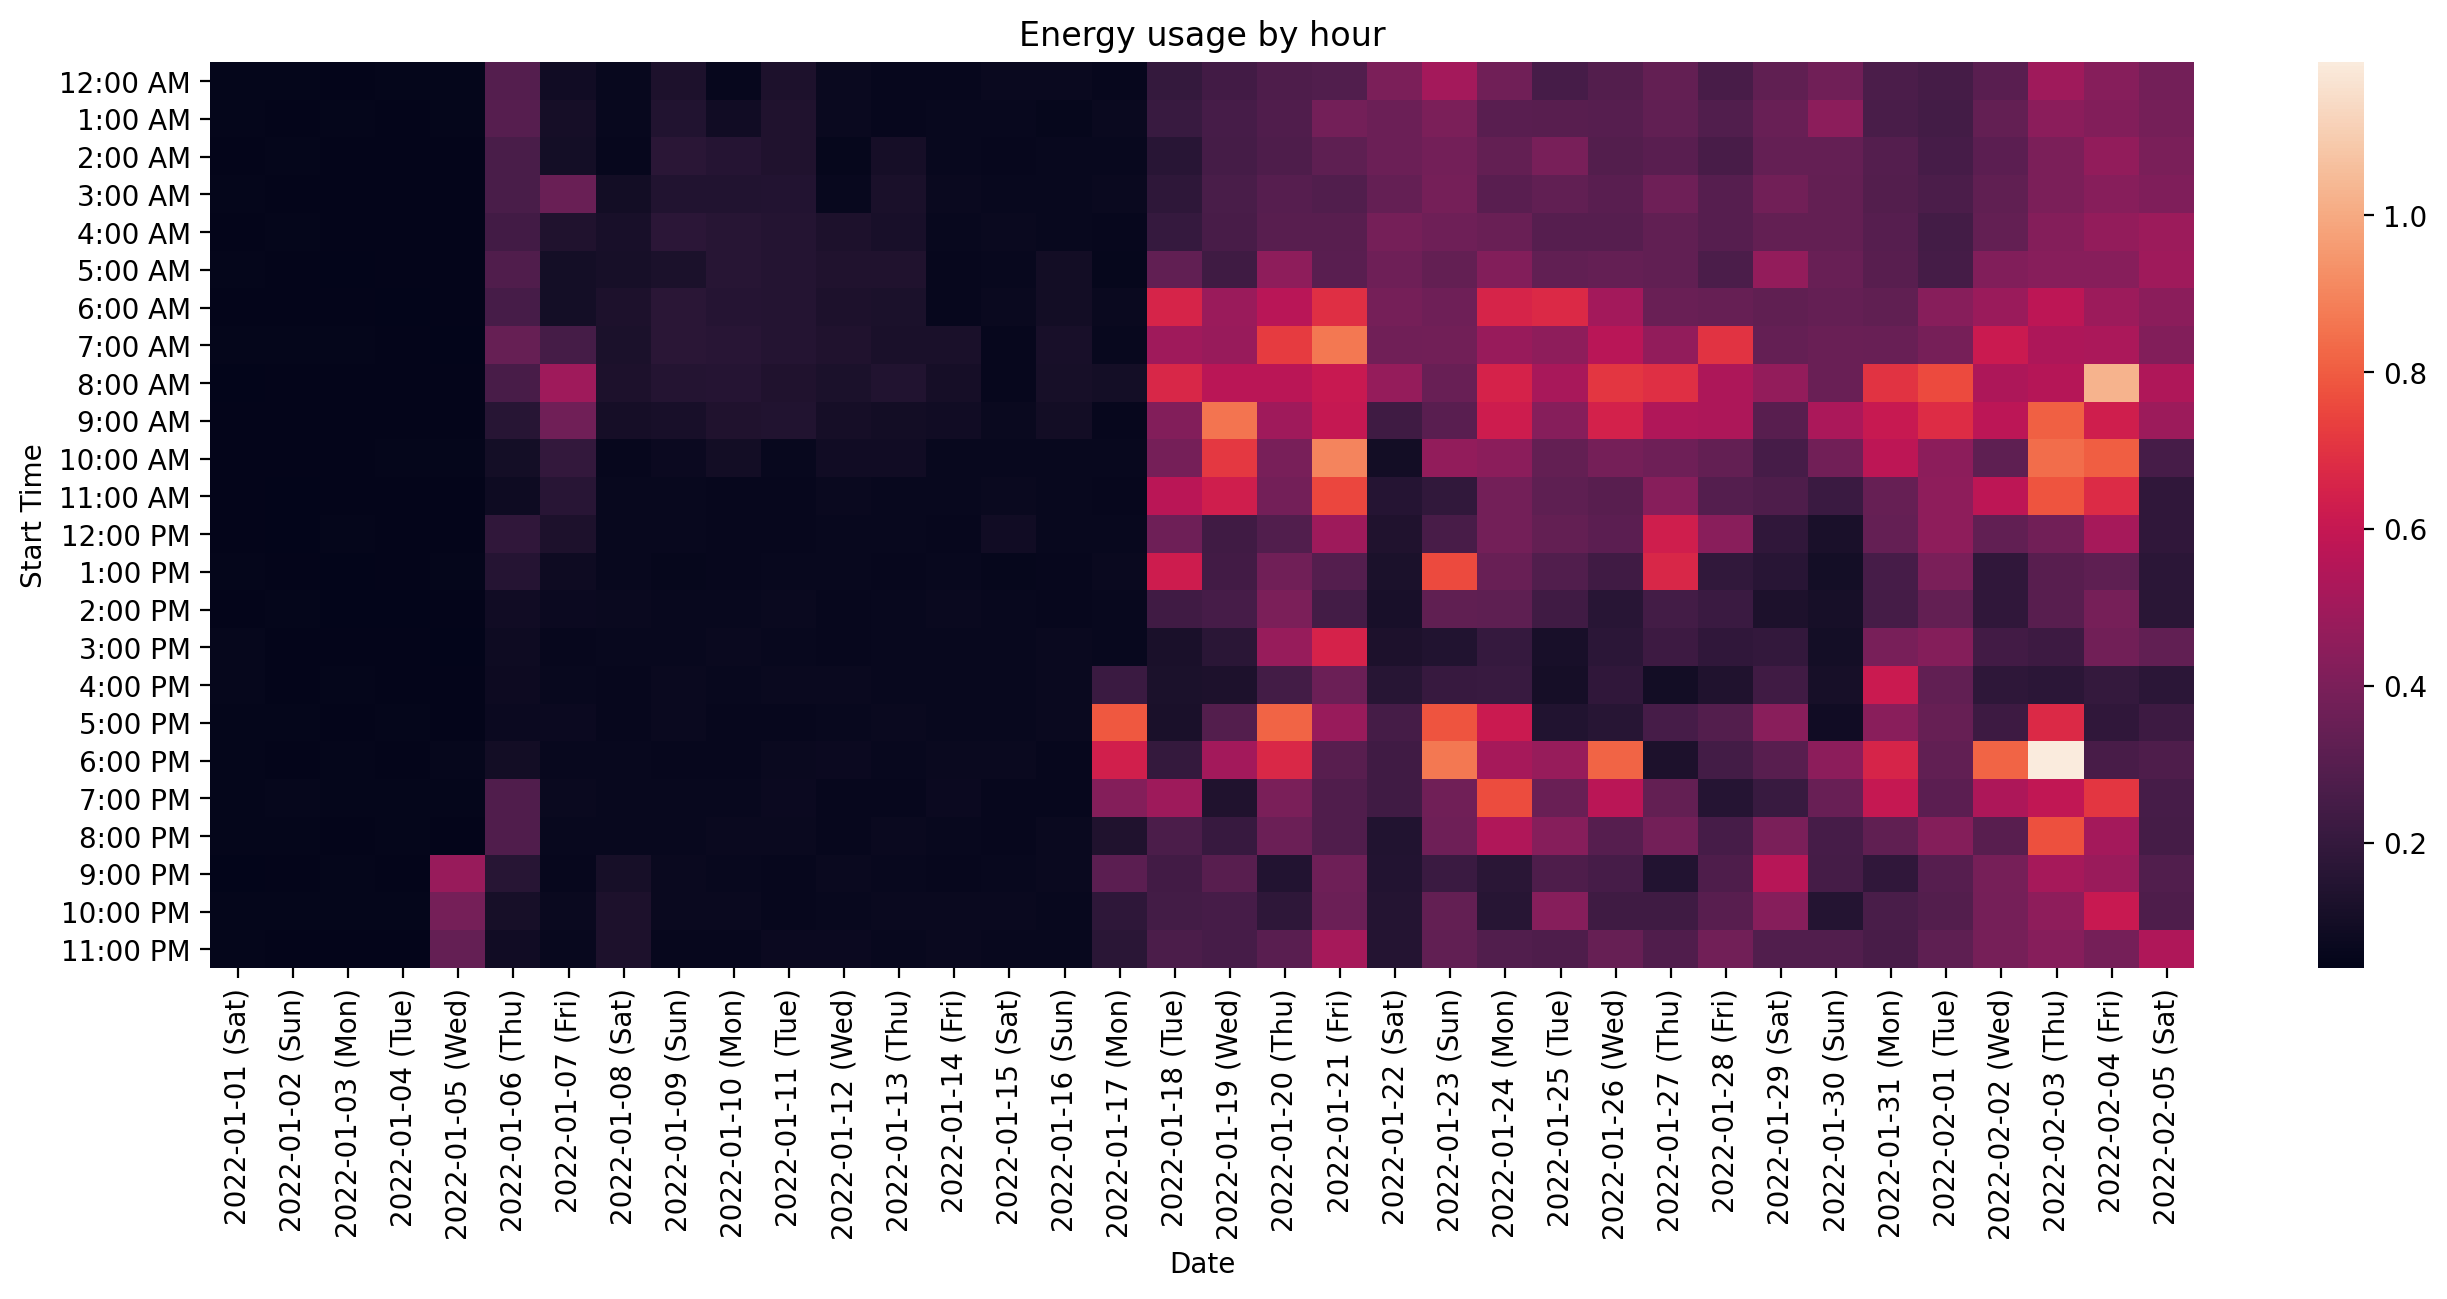

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(16,6), facecolor="w", dpi=200)

# Adding my code to format x-axis labels:
formatted_dates = create_date_strs(df["Date"])

# Adding xticklabels:
sns.heatmap(pt, ax=ax, xticklabels=formatted_dates)
            
ax.set_title("Energy usage by hour");

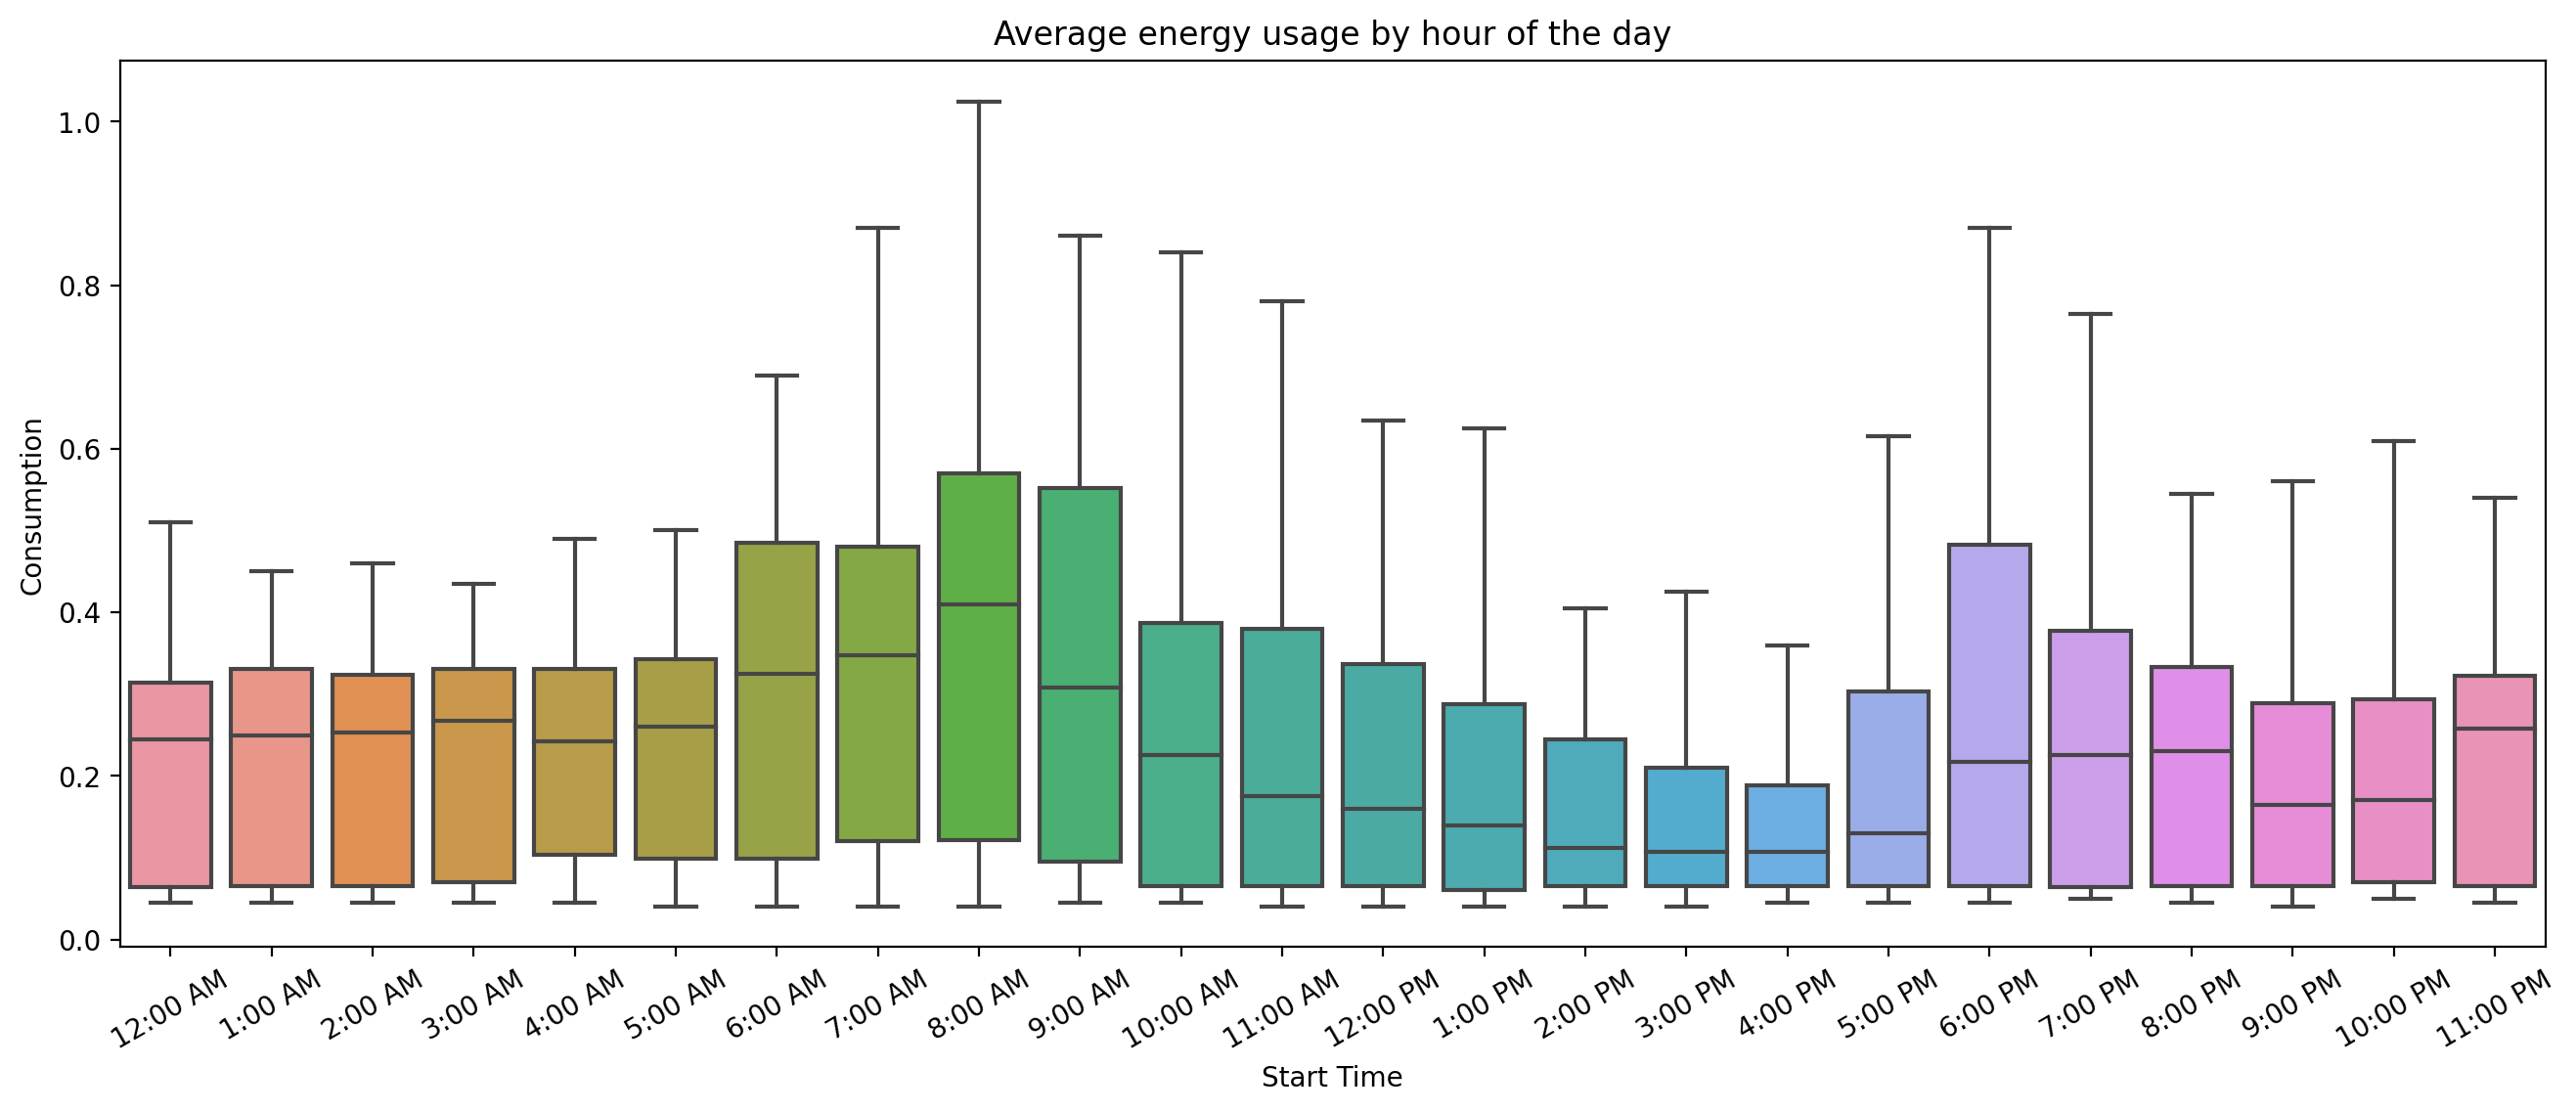

In [30]:
fig, ax = plt.subplots(figsize=(16,6), facecolor="w", dpi=200)
sns.boxplot(data=df, x="Start Time", y="Consumption", showfliers=False, ax=ax)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 30)
ax.set_title("Average energy usage by hour of the day");

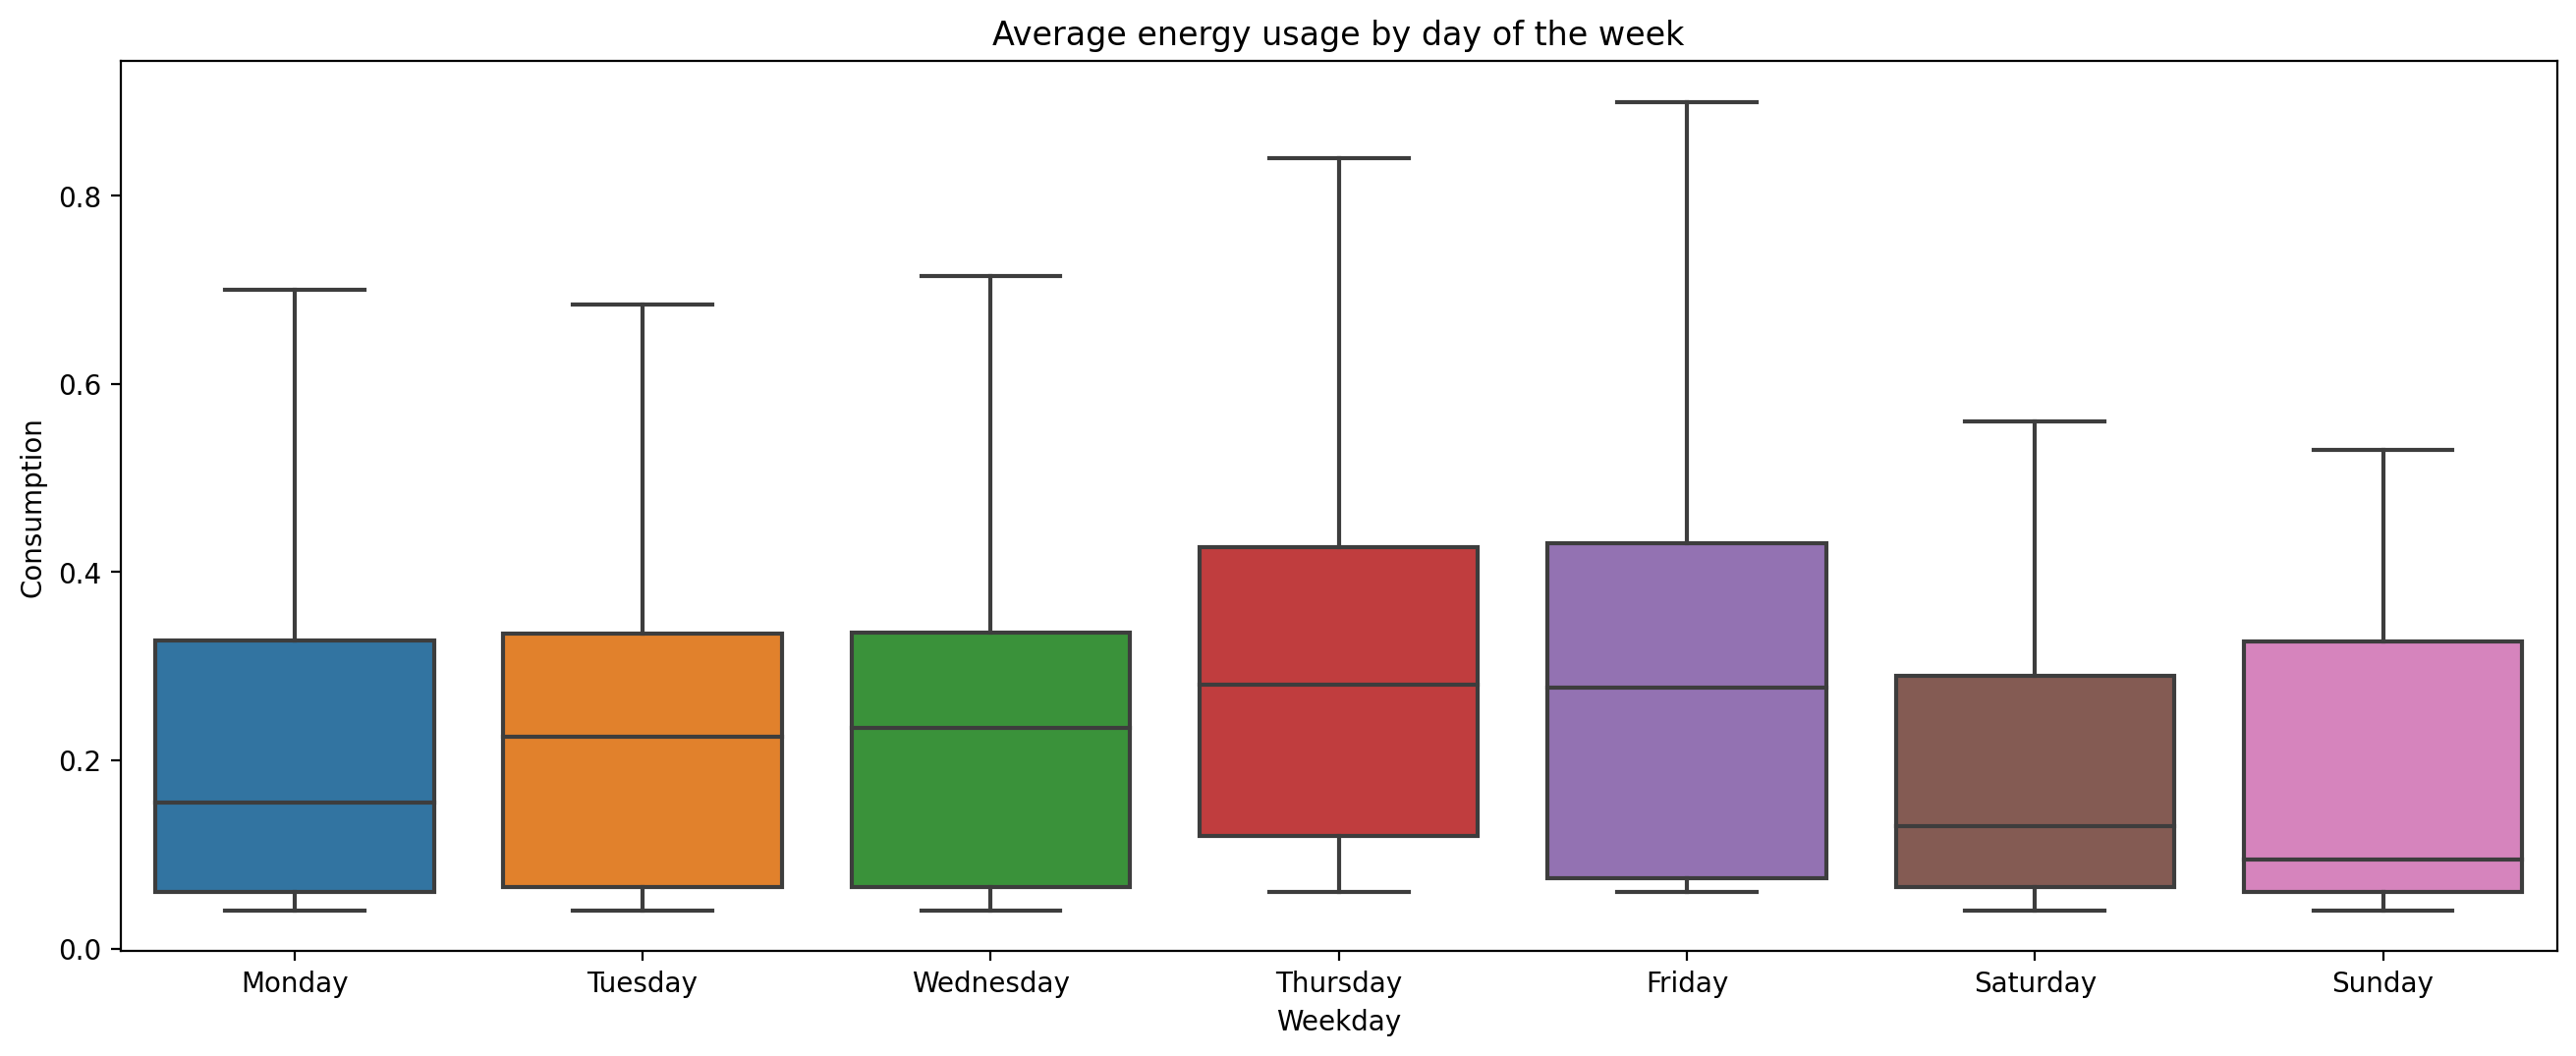

In [31]:
fig, ax = plt.subplots(figsize=(16,6), facecolor="w", dpi=200)
sns.boxplot(data=df, x="Weekday", y="Consumption", showfliers=False, ax=ax)
ax.set_xticklabels(["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])
ax.set_title("Average energy usage by day of the week");

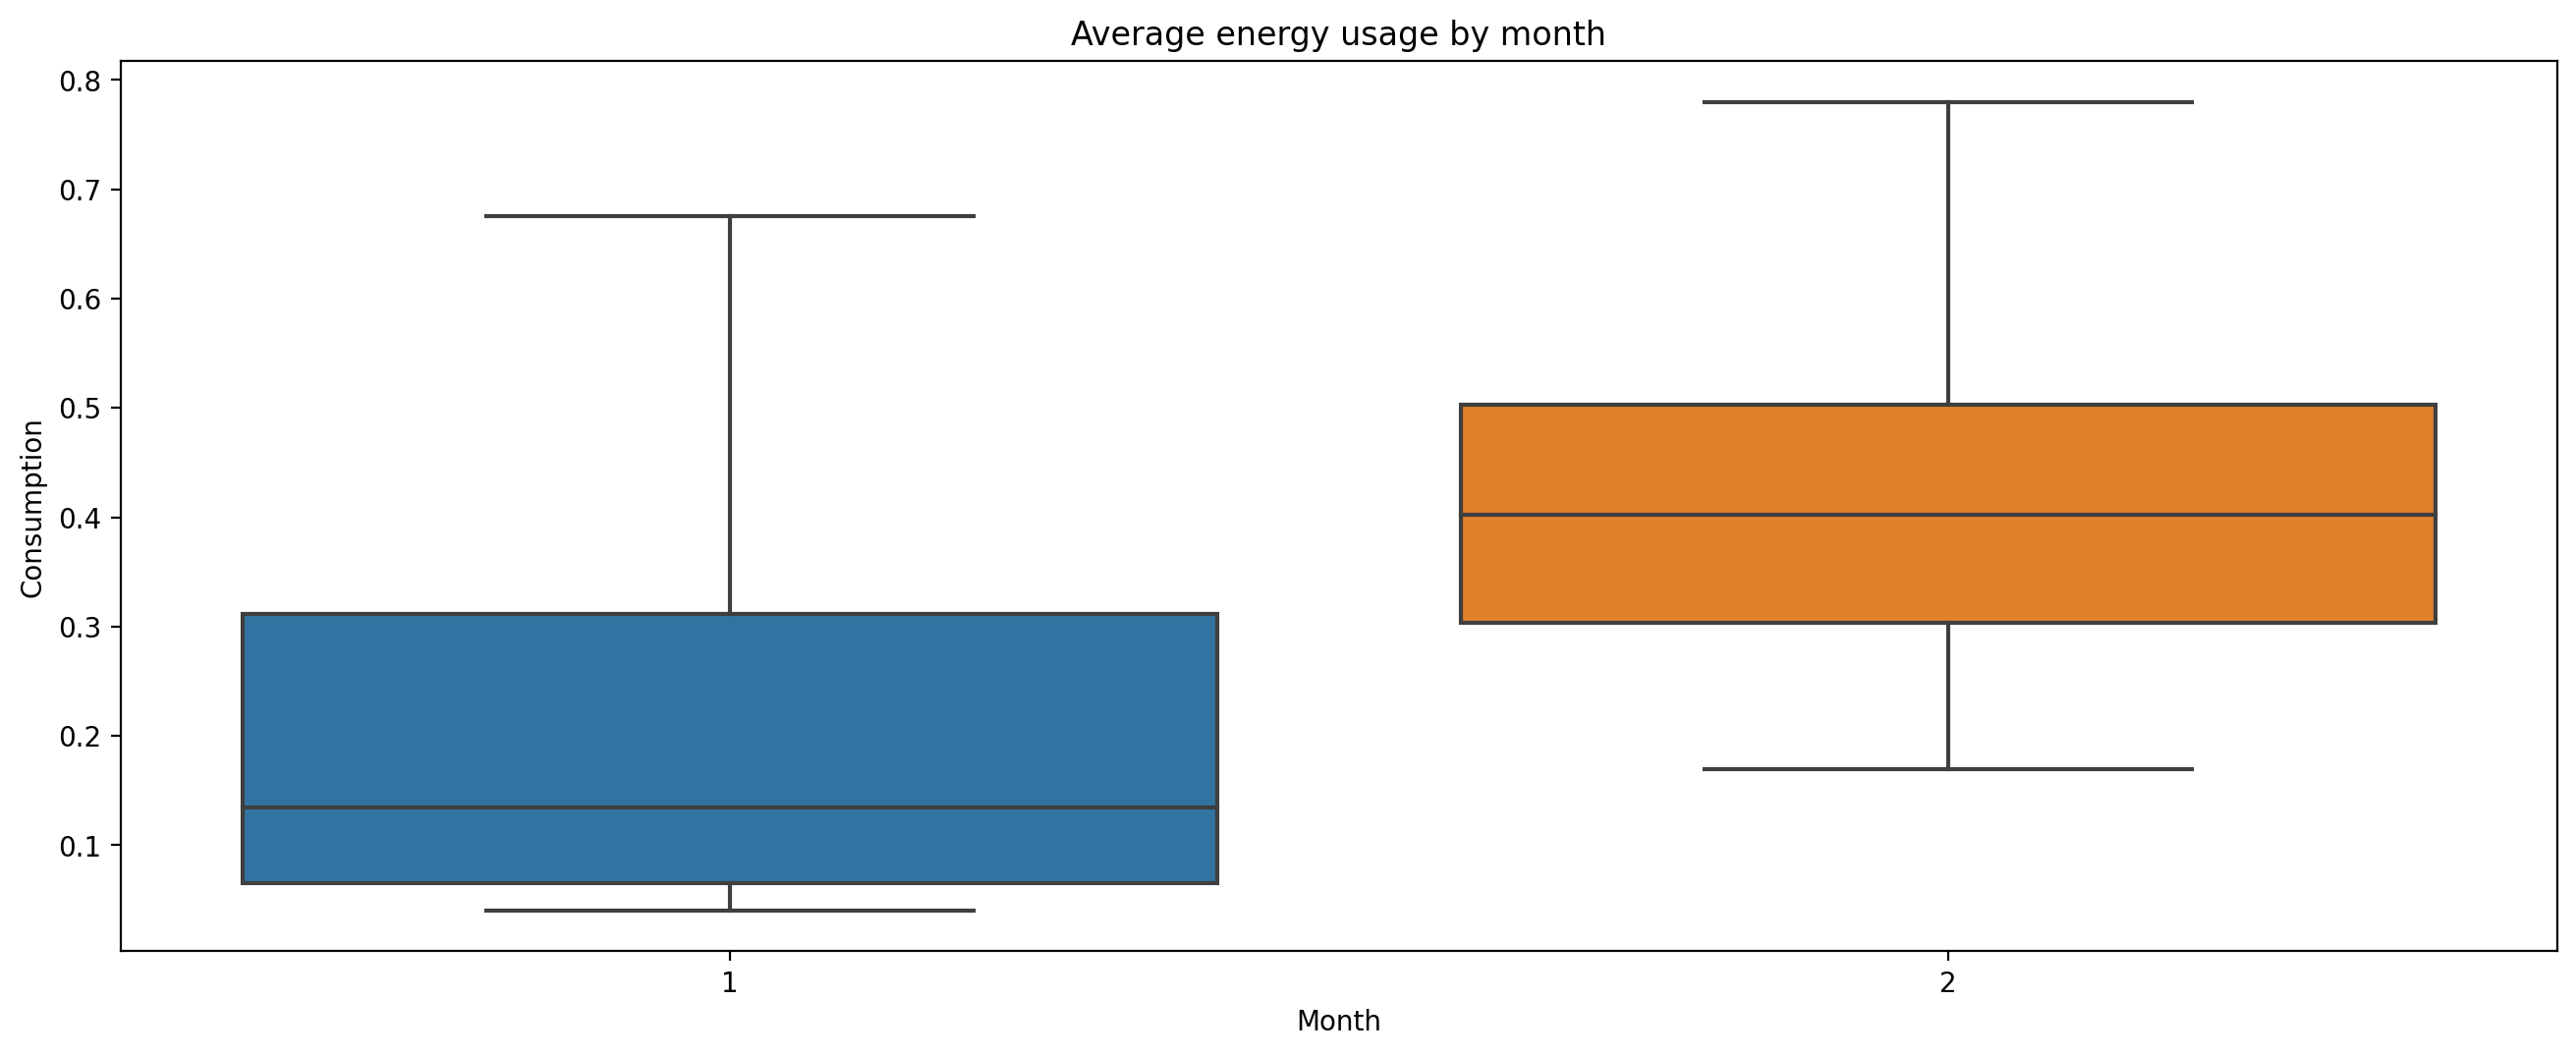

In [32]:
fig, ax = plt.subplots(figsize=(16,6), facecolor="w", dpi=200)
sns.boxplot(data=df, x="Month", y="Consumption", showfliers=False, ax=ax)
#ax.set_xticklabels(["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])
ax.set_title("Average energy usage by month");

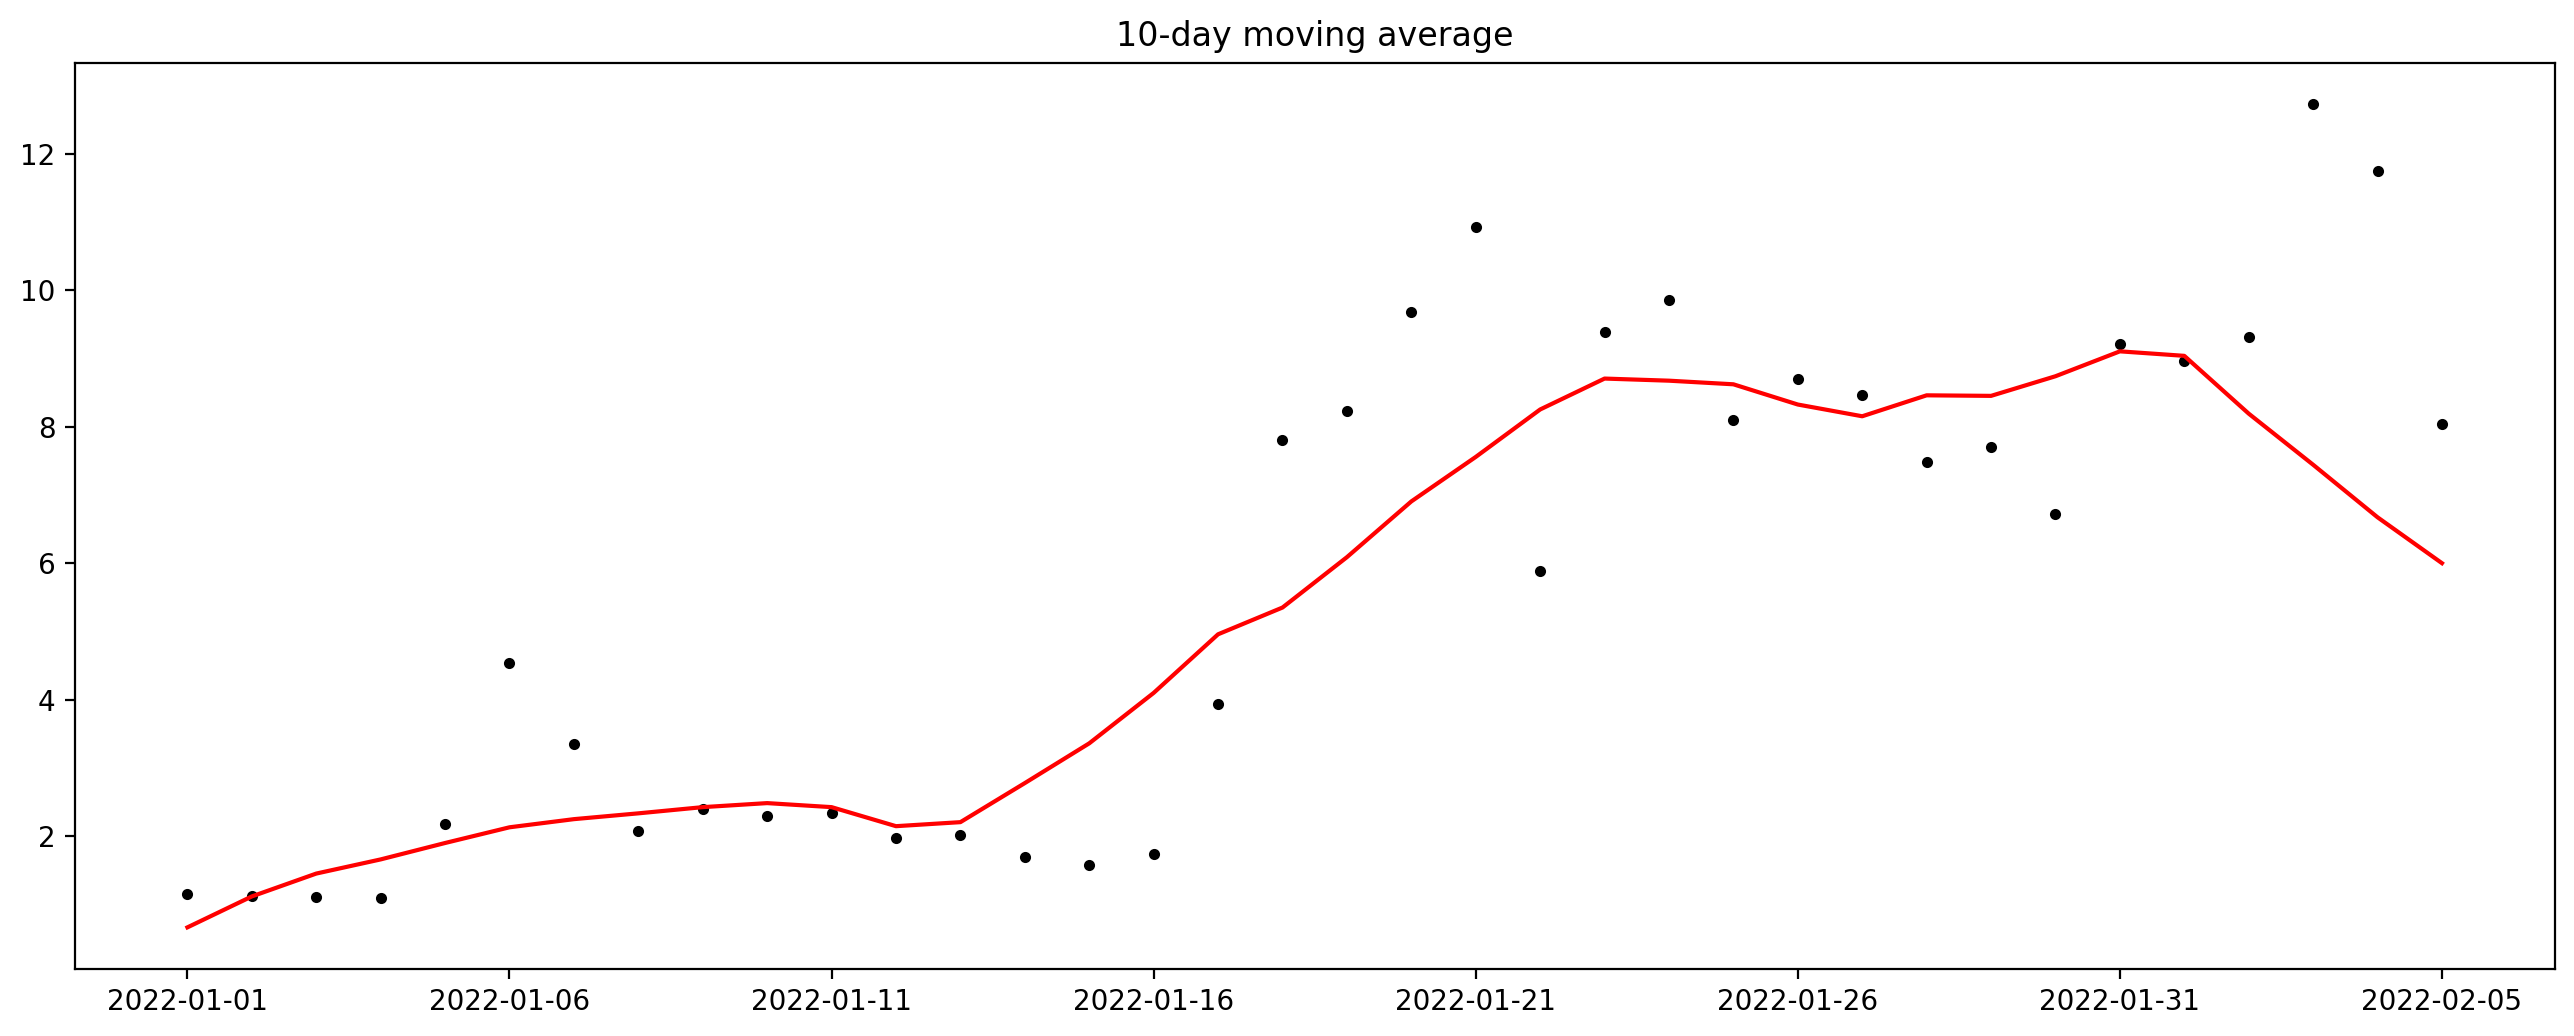

In [33]:
import numpy 
def movingaverage(interval, window_size):
    window= numpy.ones(int(window_size))/float(window_size)
    return numpy.convolve(interval, window, 'same')

totals = df.groupby("Date").sum()["Consumption"]
x = totals.index
y = list(totals)
fig, ax = plt.subplots(figsize=(16,6), facecolor="w", dpi=200)
ax.plot(x, y, "k.")
y_av = movingaverage(y, 10)
ax.plot(x, y_av,"r")
ax.set_xticks(ax.get_xticks()[::5])
ax.set_title("10-day moving average");